# HARVEST

## EDA

In [85]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

In [86]:
vinos = pd.read_csv(r"C:\Users\carra\Dropbox\PC\Desktop\Harvest\Harvest\calidad_de_vino.csv")
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   botella_id               6497 non-null   int64  
 1   acidez fija              6497 non-null   float64
 2   acidez volatil           6497 non-null   float64
 3   acido citrico            6497 non-null   float64
 4   azucar residual          6497 non-null   float64
 5   cloruros                 6497 non-null   float64
 6   dioxido de azufre libre  6497 non-null   float64
 7   dioxido de azufre total  6497 non-null   float64
 8   densidad                 6497 non-null   float64
 9   pH                       6497 non-null   float64
 10  sulfatos                 6497 non-null   float64
 11  alcohol                  6497 non-null   float64
 12  color                    6497 non-null   object 
 13  calidad                  6497 non-null   int64  
dtypes: float64(11), int64(2)

In [87]:
vinos.head()

,botella_id,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,color,calidad
0,0,9.5,0.56,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8,rojo,7
1,1,6.6,0.24,0.28,1.8,0.028,39.0,132.0,0.99182,3.34,0.46,11.4,blanco,5
2,2,9.4,0.59,0.14,2.0,0.084,25.0,48.0,0.99810,3.14,0.56,9.7,rojo,5
3,3,6.1,0.32,0.33,10.7,0.036,27.0,98.0,0.99521,3.34,0.52,10.2,blanco,6
4,4,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,blanco,6


In [88]:
#Elimino los espacios de lo nombres de la columnas, para poder trabajar mejor.

vinos = vinos.rename(columns=lambda x: x.strip().replace(" ", "_"))

In [89]:
vinos['calidad'].unique()

array([7, 5, 6, 3, 4, 8, 9], dtype=int64)

In [90]:
vinos['color'].unique()

array(['rojo', 'blanco'], dtype=object)

Separo el dataframe segun la varibale "color" para hacer un analisis enfocado a cada varuietal.

In [91]:
df_tintos = vinos[vinos['color'] == 'rojo']
df_blancos = vinos[vinos['color'] == 'blanco']


In [92]:
df_tintos.head()

,botella_id,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,color,calidad
0,0,9.5,0.56,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8,rojo,7
2,2,9.4,0.59,0.14,2.0,0.084,25.0,48.0,0.99810,3.14,0.56,9.7,rojo,5
34,34,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,rojo,5
42,42,7.7,0.69,0.05,2.7,0.075,15.0,27.0,0.99740,3.26,0.61,9.1,rojo,5
68,68,8.0,0.83,0.27,2.0,0.080,11.0,63.0,0.99652,3.29,0.48,9.8,rojo,4


In [93]:
df_blancos.head()

,botella_id,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,color,calidad
1,1,6.6,0.24,0.28,1.8,0.028,39.0,132.0,0.99182,3.34,0.46,11.4,blanco,5
3,3,6.1,0.32,0.33,10.7,0.036,27.0,98.0,0.99521,3.34,0.52,10.2,blanco,6
4,4,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,blanco,6
5,5,7.5,0.21,0.68,10.9,0.045,38.0,133.0,0.99780,3.00,0.36,8.7,blanco,5
6,6,6.0,0.28,0.24,17.8,0.047,42.0,111.0,0.99896,3.10,0.45,8.9,blanco,6


### Promedio de calidad segun varietal

In [94]:
#Promedio de los blancos

prom_blancos = df_blancos['calidad'].mean()

print('El promedio de calidad de los vinos blancos es de', prom_blancos)

El promedio de calidad de los vinos blancos es de 5.87790935075541


In [95]:
# Promedio de calidad de los tintos

prom_tintos = df_tintos['calidad'].mean()

print('El promedio de calidad de los vinos tintos es de', prom_tintos)

El promedio de calidad de los vinos tintos es de 5.6360225140712945


In [96]:
# Relacion de  la calidad con el color 
result = pd.crosstab(vinos["calidad"], vinos["color"])
result.head()

color,blanco,rojo
calidad,,
3,20,10
4,163,53
5,1457,681
6,2198,638
7,880,199


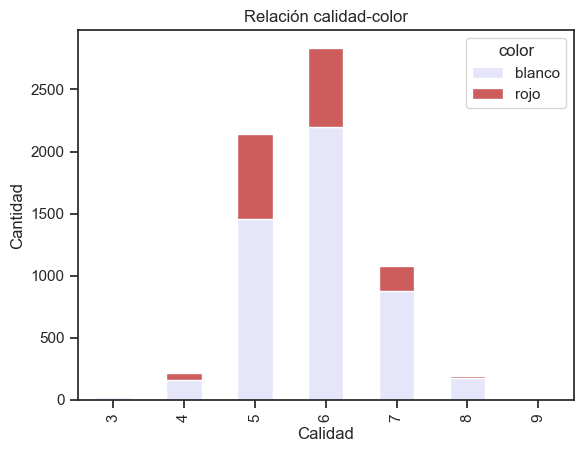

In [97]:
# Graficar el crosstab utilizando un gráfico de barras apiladas
result.plot(kind='bar', stacked=True, color = ['lavender', 'indianred'])


# Etiquetas y título
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.title('Relación calidad-color')

# Mostrar la gráfica
plt.show()

### Relación calidad, densidad y alcohol
Voy a hacer un anilisis de cada varietal, por eso uso los df varietales.

In [98]:
#BLANCOS

rel_1 = pd.pivot_table(df_blancos, index=['calidad'],values = ["alcohol","densidad"],aggfunc='mean')
rel_1

,alcohol,densidad
calidad,,
3,10.345000,0.994884
4,10.152454,0.994277
5,9.808840,0.995263
6,10.575372,0.993961
7,11.367936,0.992452
8,11.636000,0.992236
9,12.180000,0.991460


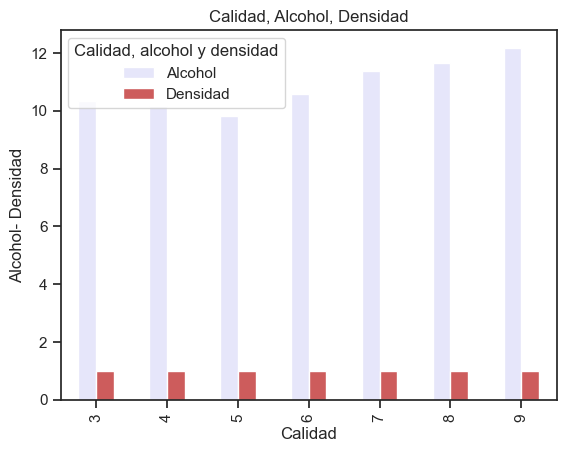

In [106]:
rel_1.plot(kind="bar", color=['lavender', 'indianred'])
plt.title('Calidad, Alcohol, Densidad')
plt.xlabel('Calidad')
plt.ylabel('Alcohol- Densidad')
plt.legend(title='Calidad, alcohol y densidad', labels=['Alcohol', 'Densidad'])
plt.show()


In [100]:
#TINTOS

rel_2 = pd.pivot_table(df_tintos, index=['calidad'],values = ["alcohol","densidad"],aggfunc='mean')
rel_2

,alcohol,densidad
calidad,,
3,9.955000,0.997464
4,10.265094,0.996542
5,9.899706,0.997104
6,10.629519,0.996615
7,11.465913,0.996104
8,12.094444,0.995212


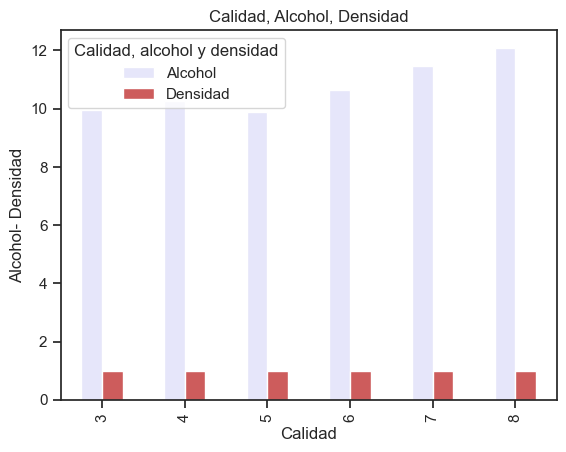

In [107]:
rel_2.plot(kind="bar", color=['lavender', 'indianred'])
plt.title('Calidad, Alcohol, Densidad')
plt.xlabel('Calidad')
plt.ylabel('Alcohol- Densidad')
plt.legend(title='Calidad, alcohol y densidad', labels=['Alcohol', 'Densidad'])
plt.show()

### Correlacion  de azúcares, acidez, sultfitos y alcohol según el varietal.

In [103]:
import seaborn as sns

In [114]:
# Creo un nuevo dataframe especifico para la matriz de correlación con las variables que necesito.
# Lista de nombres de columnas a incluir en el nuevo DataFrame
selec_1= ['acidez_fija','acidez_volatil','acido_citrico','azucar_residual', 'sulfatos', 'alcohol']  

# Creo el nuevo dataframe
tinto_2= df_tintos[selec_1].copy()

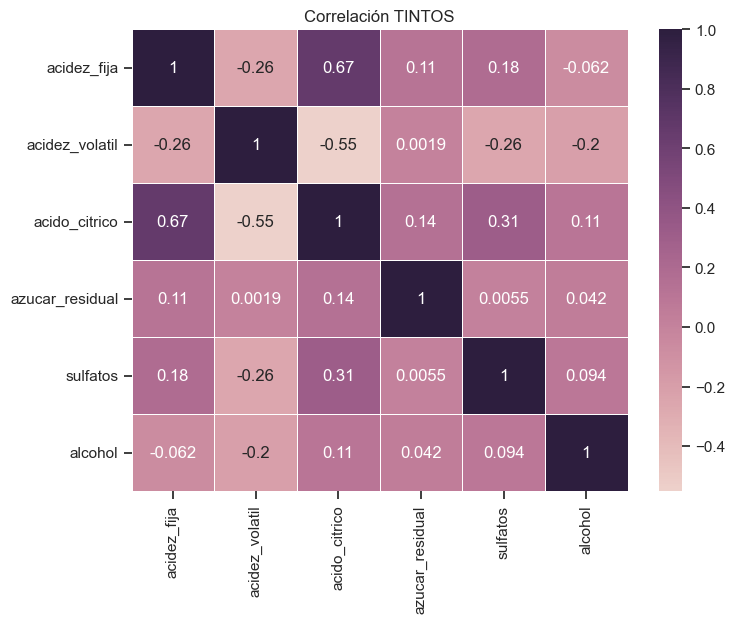

In [141]:
# Calcular la matriz de correlación
corr_tinto= tinto_2.corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
col_1= sns.cubehelix_palette(as_cmap=True)
sns.heatmap(corr_tinto, cmap= col_1, annot=True, linewidths=0.5)
plt.title('Correlación TINTOS')
plt.show()

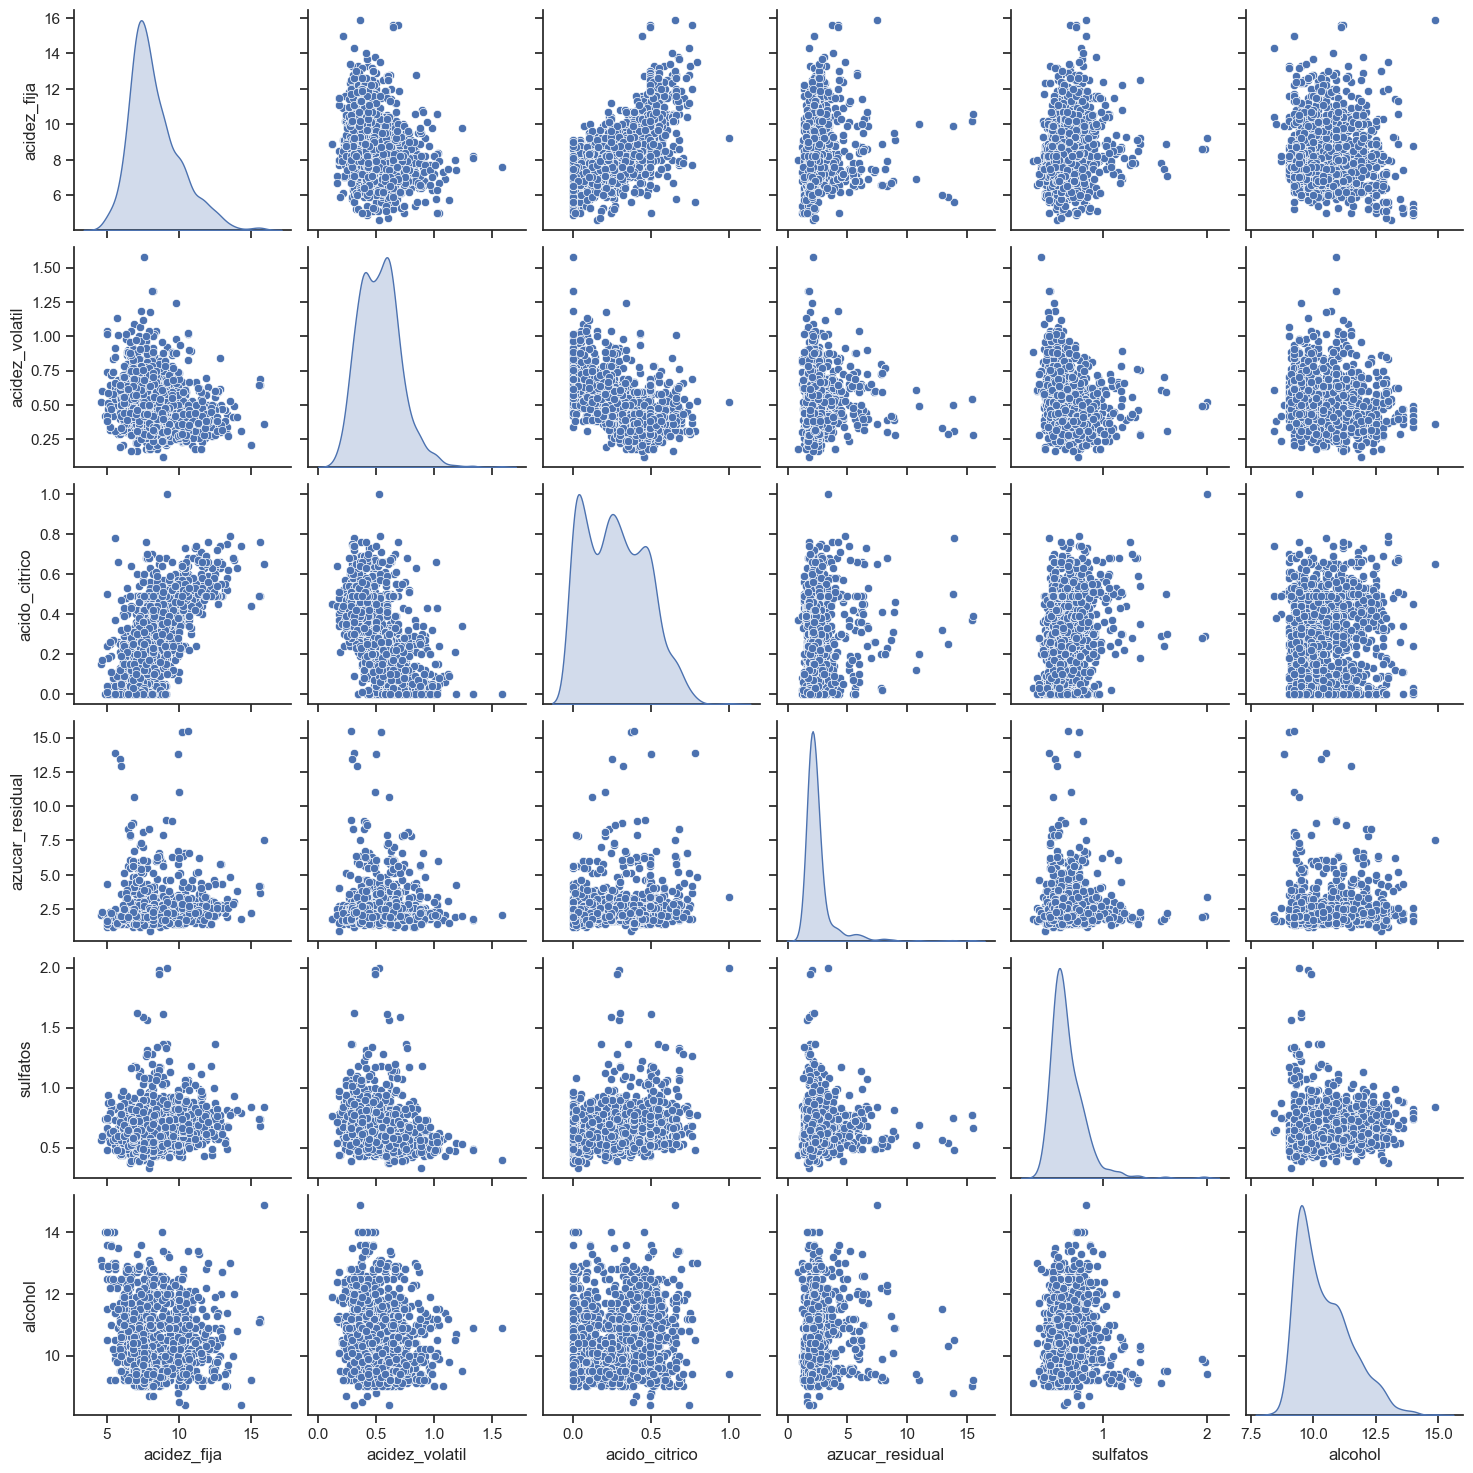

In [145]:
# Pairplot con variatales y sus variables de interés.

sns.set(style="ticks")
sns.pairplot(tinto_2, diag_kind="kde", markers="o")
plt.show()


In [123]:
# Creo un nuevo dataframe especifico para la matriz de correlación con las variables que necesito.
# Lista de nombres de columnas a incluir en el nuevo DataFrame
selec_2= ['acidez_fija','acidez_volatil','acido_citrico','azucar_residual', 'sulfatos', 'alcohol']  

# Creo el nuevo dataframe
blanco_2= df_blancos[selec_2].copy()

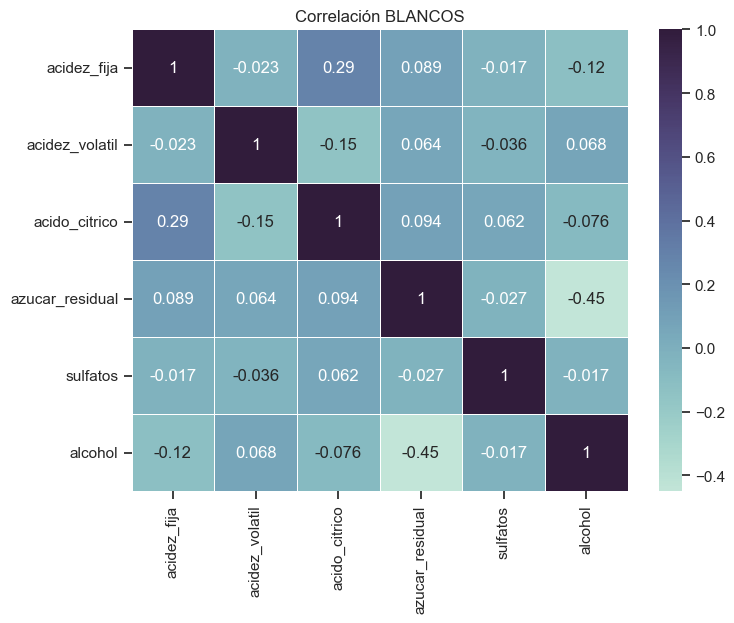

In [147]:
# Calcular la matriz de correlación
corr_blanco = blanco_2.corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
col_2 = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(corr_blanco, annot=True, cmap=col_2, linewidths=0.5)
plt.title('Correlación BLANCOS')
plt.show()

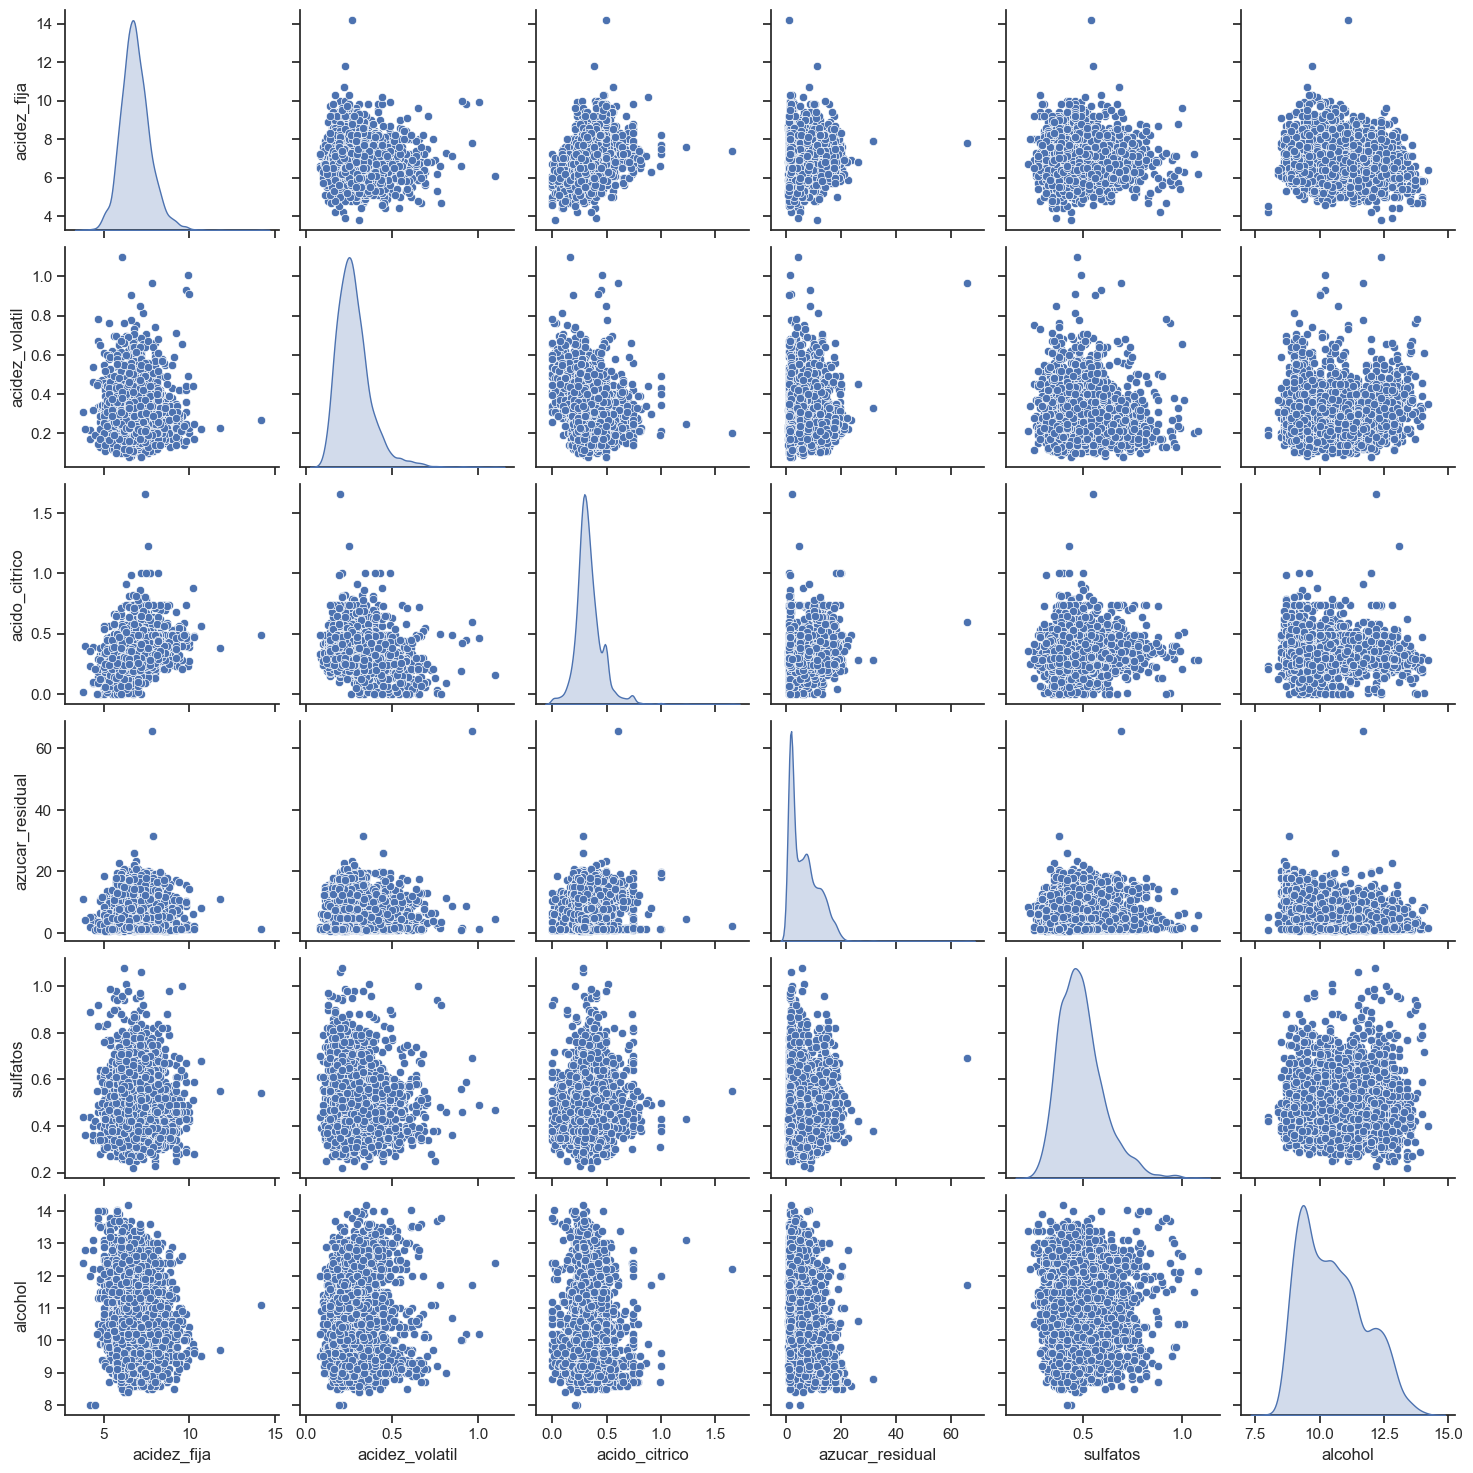

In [129]:
# Pairplot con variatales y sus variables de interés.

sns.set(style="ticks")
sns.pairplot(blanco_2, diag_kind="kde", markers="o")
plt.show()